### Detection of fraudulent transactions in a credit card dataset.

##### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

##### Load data

In [2]:
df = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week8&9/github/Fraud_detection/cleaned_data/Preprocessed_Creditcard_Data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,time_in_days,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000012,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000012,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000023,-0.073813


##### Visual class distribution

Class
0    283253
1       473
Name: count, dtype: int64


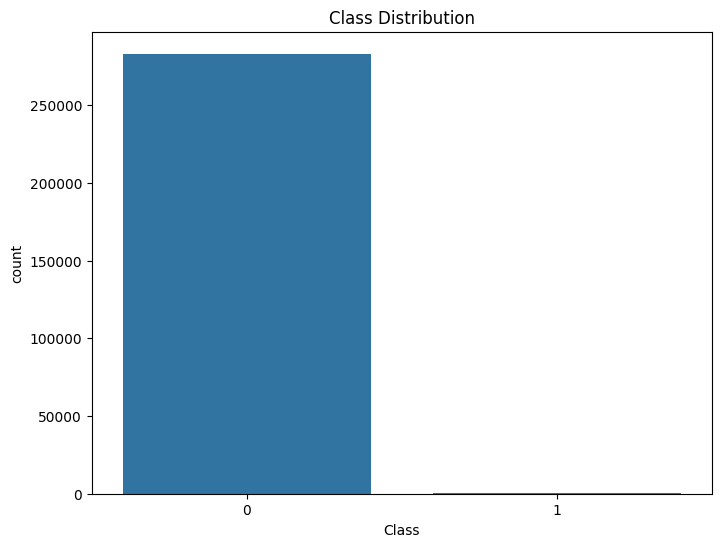

In [3]:
# Visualize Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

##### Feature-Target Separation and Data Splitting

##### Using SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic data

In [4]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Scaling the Features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Training a Logistic Regression Model

In [7]:
Logistic_regression_m = LogisticRegression()
Logistic_regression_m.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = Logistic_regression_m.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

[[55943   520]
 [ 1856 54983]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302

Accuracy: 0.9790294963901784
Precision: 0.9906311370556546
Recall: 0.9673463642921234
F1-Score: 0.9788502964163003


##### Training a Random forest model

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest_m = RandomForestClassifier(class_weight='balanced')
random_forest_m.fit(X, y)

RFM_y_pred_lr = random_forest_m.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, RFM_y_pred_lr))
print(classification_report(y_test, RFM_y_pred_lr))
print("Accuracy:", accuracy_score(y_test, RFM_y_pred_lr))
print("Precision:", precision_score(y_test, RFM_y_pred_lr))
print("Recall:", recall_score(y_test, RFM_y_pred_lr))
print("F1-Score:", f1_score(y_test, RFM_y_pred_lr))

c:\Users\elbet\miniconda3\envs\elbetel\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[56463     0]
 [53907  2932]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     56463
           1       1.00      0.05      0.10     56839

    accuracy                           0.52    113302
   macro avg       0.76      0.53      0.39    113302
weighted avg       0.76      0.52      0.39    113302

Accuracy: 0.5242184603978747
Precision: 1.0
Recall: 0.05158429951265856
F1-Score: 0.09810777801944087


##### Training a Gradient Boosting Model

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


GBC_y_pred = gb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, GBC_y_pred))
print(classification_report(y_test, GBC_y_pred))
print("Accuracy:", accuracy_score(y_test, GBC_y_pred))
print("Precision:", precision_score(y_test, GBC_y_pred))
print("Recall:", recall_score(y_test, GBC_y_pred))
print("F1-Score:", f1_score(y_test, GBC_y_pred))

[[56113   350]
 [ 1196 55643]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56463
           1       0.99      0.98      0.99     56839

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99      0.99      0.99    113302

Accuracy: 0.9863550511023635
Precision: 0.9937492186523316
Recall: 0.9789581097485881
F1-Score: 0.9862982132728304


##### Training a DecisionTree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DT_y_pred = gb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, DT_y_pred))
print(classification_report(y_test, DT_y_pred))
print("Accuracy:", accuracy_score(y_test, DT_y_pred))
print("Precision:", precision_score(y_test, DT_y_pred))
print("Recall:", recall_score(y_test, DT_y_pred))
print("F1-Score:", f1_score(y_test, DT_y_pred))

[[56113   350]
 [ 1196 55643]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56463
           1       0.99      0.98      0.99     56839

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99      0.99      0.99    113302

Accuracy: 0.9863550511023635
Precision: 0.9937492186523316
Recall: 0.9789581097485881
F1-Score: 0.9862982132728304
